In [33]:
# Path configuration
DATA_URL = "https://raw.githubusercontent.com/Bmiami988/uganda-school-data/main/schools.csv"
GEOJSON_URL = "https://raw.githubusercontent.com/Bmiami988/uganda-school-data/main/northern_uganda_districts.geojson"

# Visualization settings
COLOR_PALETTE = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
PLOT_STYLE = "whitegrid" # Changed 'seaborn' to 'whitegrid'
FIGURE_SIZE = (12, 8)

# Analysis parameters
PERFORMANCE_BINS = [0, 40, 60, 80, 100]
PERFORMANCE_LABELS = ['Low', 'Medium', 'High', 'Excellent']
CLUSTER_K = 5

print(DATA_URL)
print(GEOJSON_URL)

https://raw.githubusercontent.com/Bmiami988/uganda-school-data/main/schools.csv
https://raw.githubusercontent.com/Bmiami988/uganda-school-data/main/northern_uganda_districts.geojson


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def configure_environment():
    """Set up the environment for analysis"""
    sns.set_style(PLOT_STYLE)
    plt.rcParams['figure.figsize'] = FIGURE_SIZE
    pd.set_option('display.max_columns', 50)

def clean_school_data(df):
    """Clean and preprocess school data"""
    # Handle missing values
    df = df.dropna(subset=['student_population', 'performance_score'])

    # Remove unrealistic values
    df = df[df['student_population'] > 0]
    df = df[df['performance_score'].between(0, 100)]

    # Add categorical features
    df['performance_category'] = pd.cut(
        df['performance_score'],
        bins=PERFORMANCE_BINS,
        labels=PERFORMANCE_LABELS
    )

    return df

def save_plot(filename):
    """Save plot to output directory"""
    plt.tight_layout()
    plt.savefig(f"output/{filename}", dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    configure_environment()

    # Load and clean data
    df = pd.read_csv(DATA_URL)
    df = clean_school_data(df)

    print(df.head())

  school_id                            school_name district  \
0     S1000          Victory Moreno Primary School     Gulu   
1     S1001  Hope Scott Nursery and Primary School   Dokolo   
2     S1002       Bishop Robinson Secondary School     Lira   
3     S1003                 Victory Steele Academy    Yumbe   
4     S1004               Our Lady of Carr College    Nwoya   

   student_population  performance_score  resource_needs_score  \
0                 402                 47                    75   
1                 171                 38                    73   
2                 766                 54                    61   
3                 472                 79                    78   
4                 761                 56                    68   

  performance_category  
0               Medium  
1                  Low  
2               Medium  
3                 High  
4               Medium  



1. DATA LOADING AND INITIAL INSPECTION

This notebook loads and performs initial inspection of the Ugandan schools dataset.



Initial inspection

In [13]:
schools_df = pd.read_csv(DATA_URL)
print('\n FIRST 5 ROWS')
print(schools_df.head())
print('\n LAST 5 ROWS')
print(schools_df.tail())
print('\n DATA SHAPE')
print(schools_df.shape)
print('\n DATA INFO')
print(schools_df.info())
print('\n DATA STATISTICS')
print(schools_df.describe())






 FIRST 5 ROWS
  school_id                            school_name district  \
0     S1000          Victory Moreno Primary School     Gulu   
1     S1001  Hope Scott Nursery and Primary School   Dokolo   
2     S1002       Bishop Robinson Secondary School     Lira   
3     S1003                 Victory Steele Academy    Yumbe   
4     S1004               Our Lady of Carr College    Nwoya   

   student_population  performance_score  resource_needs_score  
0                 402                 47                    75  
1                 171                 38                    73  
2                 766                 54                    61  
3                 472                 79                    78  
4                 761                 56                    68  

 LAST 5 ROWS
   school_id                              school_name       district  \
55     S1055           Bishop Morris Secondary School  Alexandratown   
56     S1056            St. Paul's Martin High School     

# **DATA CLEANING**

Clean and Save the Data

In [16]:
clean_df = clean_school_data(schools_df)
print("\n FIRST 5 ROWS")
print(clean_df.head())
print("\n DATA SHAPE")
print(clean_df.shape)
clean_df.to_csv('/content/clean_schools_data.csv', index=False)


 FIRST 5 ROWS
  school_id                            school_name district  \
0     S1000          Victory Moreno Primary School     Gulu   
1     S1001  Hope Scott Nursery and Primary School   Dokolo   
2     S1002       Bishop Robinson Secondary School     Lira   
3     S1003                 Victory Steele Academy    Yumbe   
4     S1004               Our Lady of Carr College    Nwoya   

   student_population  performance_score  resource_needs_score  \
0                 402                 47                    75   
1                 171                 38                    73   
2                 766                 54                    61   
3                 472                 79                    78   
4                 761                 56                    68   

  performance_category  
0               Medium  
1                  Low  
2               Medium  
3                 High  
4               Medium  

 DATA SHAPE
(60, 7)


# **BASIC STATISTICS**

*Here we:*

*   compute basic statistics for the schools dataset
*   Analyze missing values
*   Visulaize basic statistics(perfomance distribution)





NUMERIC FEATURES STATISTCS


,student_population,performance_score,resource_needs_score
count,60.000000,60.000000,60.000000
mean,492.783333,55.550000,64.016667
std,211.431288,14.356744,14.010277
min,140.000000,30.000000,25.000000
25%,338.500000,46.000000,53.000000
50%,496.500000,54.500000,66.000000
75%,626.500000,65.250000,75.250000
max,1171.000000,90.000000,86.000000


CATEGORICAL FEATURES STATISTCS


,school_id,school_name,district
count,60,60,60
unique,60,60,36
top,S1000,Victory Moreno Primary School,Maracha
freq,1,1,5


MISSING VALUES ANALYSIS
school_id               0
school_name             0
district                0
student_population      0
performance_score       0
resource_needs_score    0
performance_category    0
dtype: int64


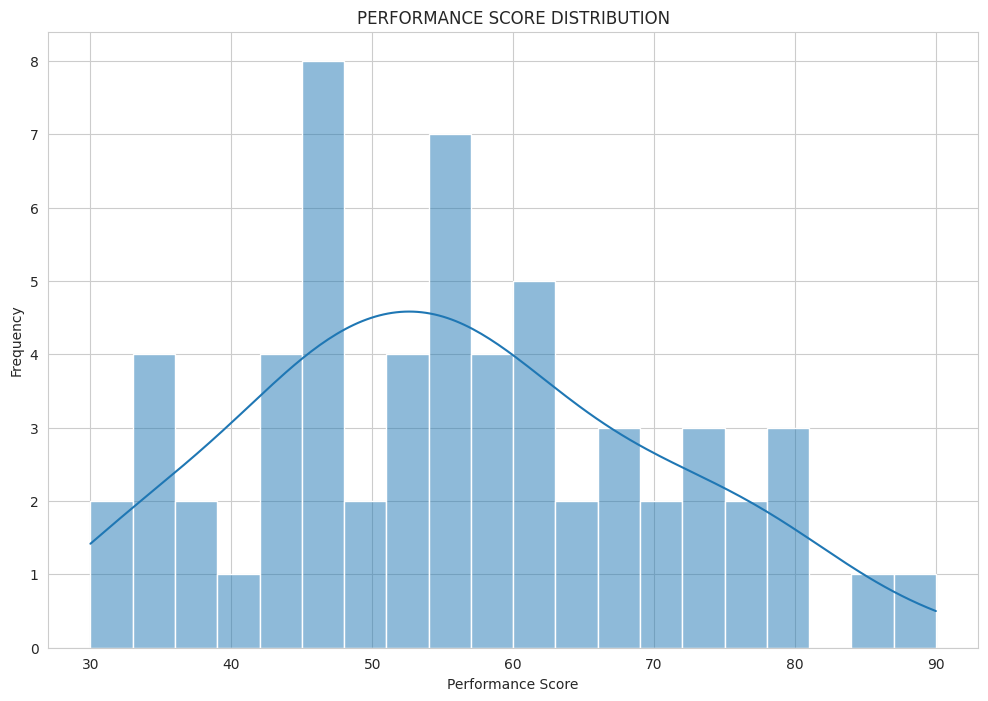

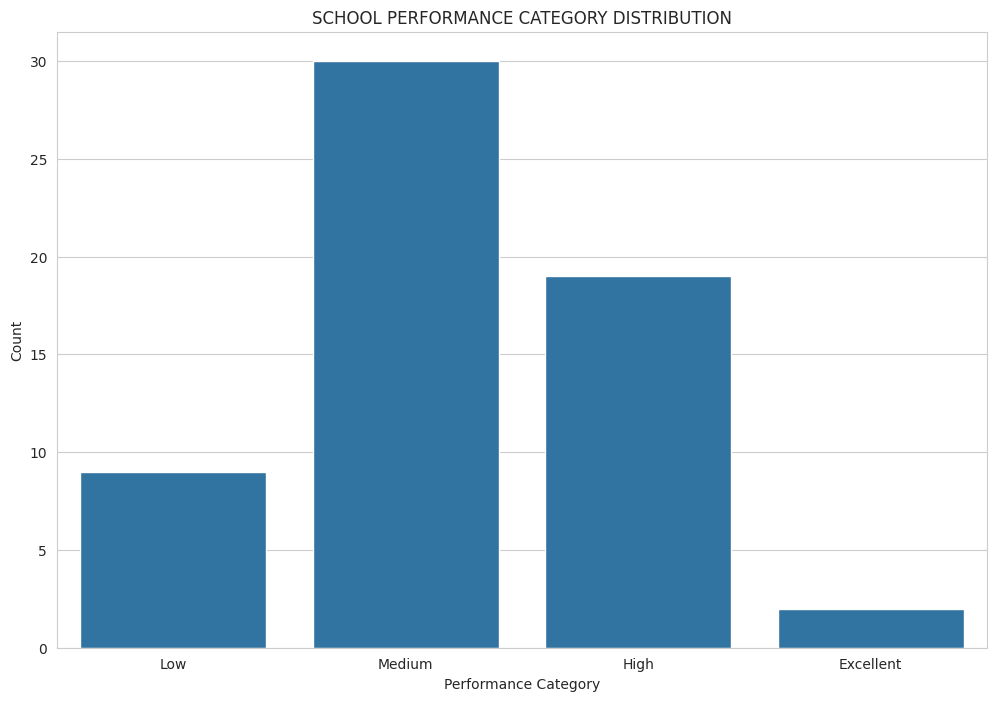

In [20]:
#descriptive & categorical statistics
print("NUMERIC FEATURES STATISTCS")
display(clean_df.describe())
print("CATEGORICAL FEATURES STATISTCS")
display(clean_df.describe(include='object'))

#Missing values analysis
print("MISSING VALUES ANALYSIS")
print(clean_df.isnull().sum())

#Performance Distribution
plt.figure(figsize=FIGURE_SIZE)
sns.histplot(clean_df['performance_score'], bins=20, kde=True)
plt.title('PERFORMANCE SCORE DISTRIBUTION')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()

sns.countplot(data=clean_df, x='performance_category')
plt.title('SCHOOL PERFORMANCE CATEGORY DISTRIBUTION')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.show()



# **DISTRIBUTION ANALYSIS**



*   *Here we analyze distributions of key variables across Northern Uganda*



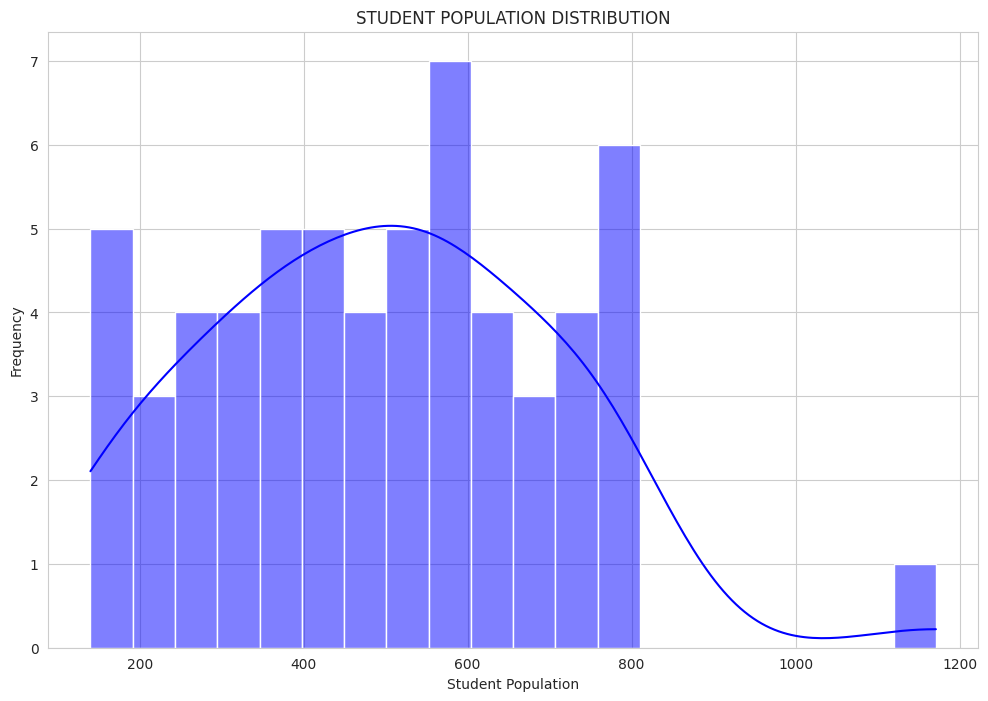

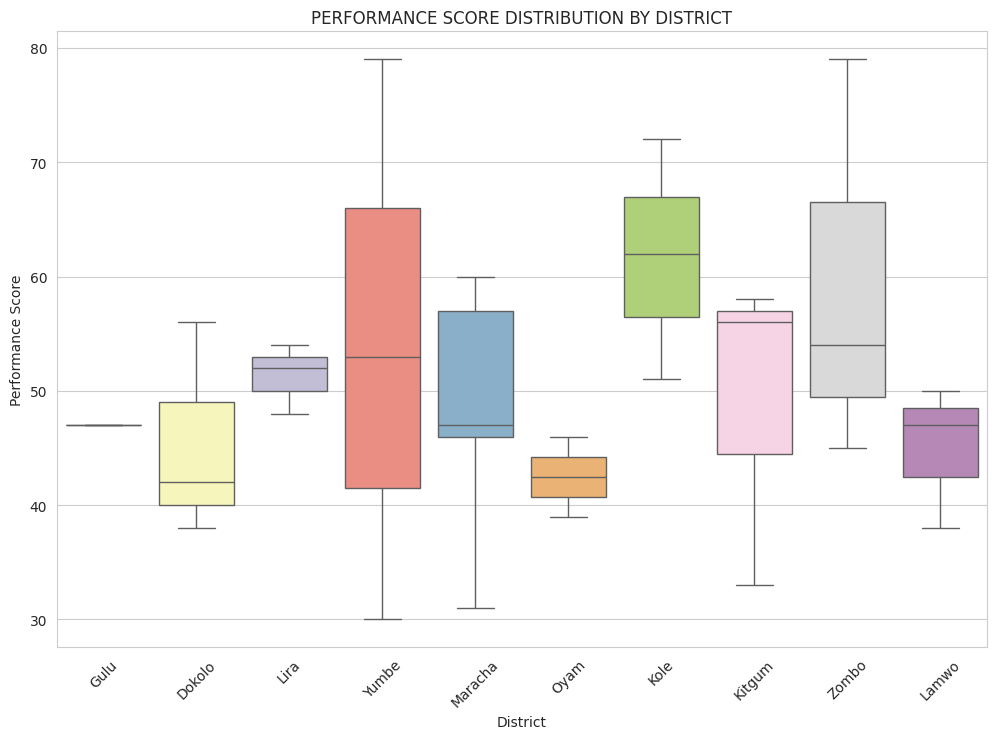

In [25]:
#student population distribution
plt.figure(figsize=FIGURE_SIZE)
sns.histplot(clean_df['student_population'], bins=20, kde=True, color='blue')
plt.title('STUDENT POPULATION DISTRIBUTION')
plt.xlabel('Student Population')
plt.ylabel('Frequency')
plt.show()

#Performance Score Distribution by District
plt.figure(figsize=FIGURE_SIZE)
sns.boxplot(x='district', y='performance_score',data=clean_df[clean_df['district'].isin(clean_df['district'].value_counts().index[:10])], palette='Set3', dodge=False, hue='district')
plt.title('PERFORMANCE SCORE DISTRIBUTION BY DISTRICT')
plt.xlabel('District')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.show()

# **CORRELATION ANALYSIS**



*   *We examine relationships between different school characteristics.*




CORRELATION MATRIX


,student_population,performance_score,resource_needs_score
student_population,1.000000,-0.114884,0.144242
performance_score,-0.114884,1.000000,-0.225117
resource_needs_score,0.144242,-0.225117,1.000000


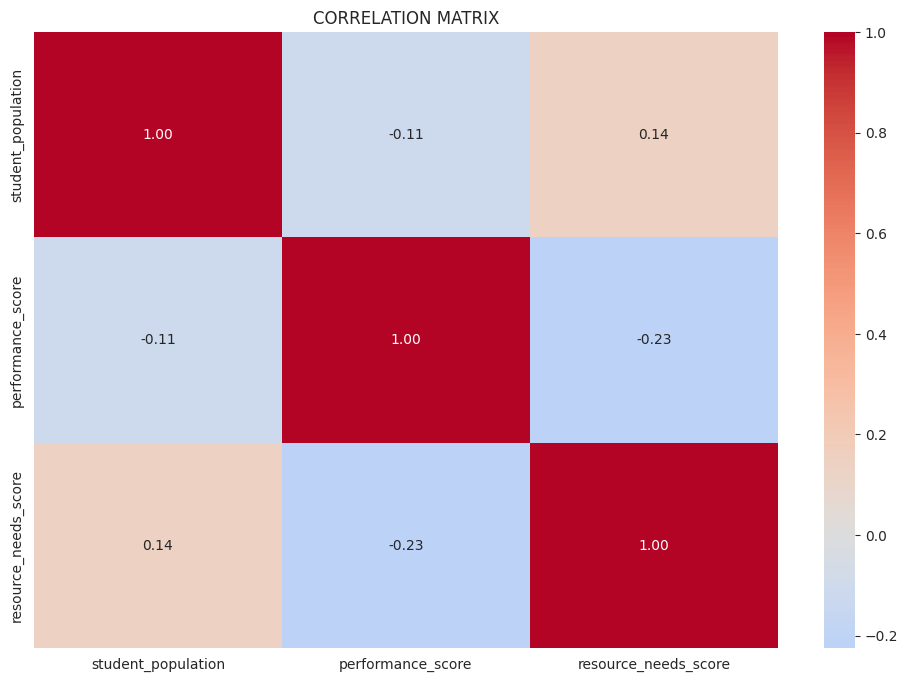

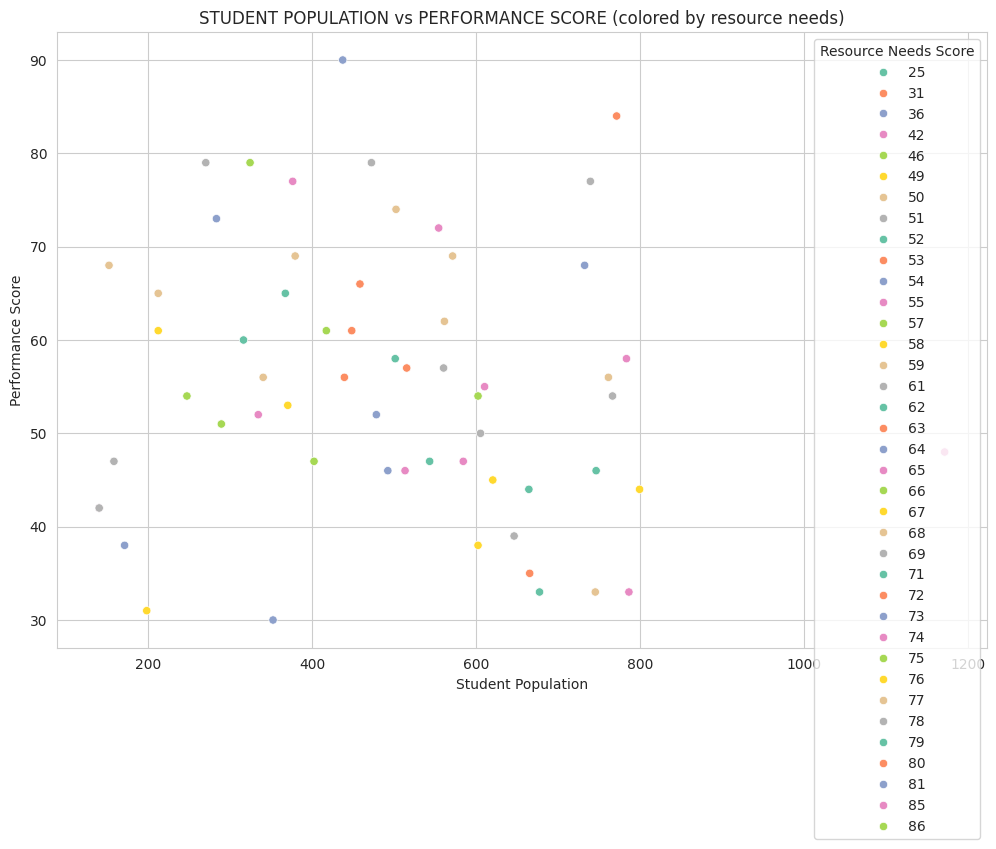

In [29]:
#CORRELATION MATRIX
corr = clean_df[['student_population', 'performance_score','resource_needs_score']].corr()
print("CORRELATION MATRIX")
display(corr)

plt.figure(figsize=FIGURE_SIZE)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('CORRELATION MATRIX')
plt.show()

#SCATTER PLOT
plt.figure(figsize=FIGURE_SIZE)
sns.scatterplot(
    data=clean_df,
    x='student_population',
    y='performance_score',
    hue='resource_needs_score',  # adds color dimension
    palette='Set2'
)
plt.title('STUDENT POPULATION vs PERFORMANCE SCORE (colored by resource needs)')
plt.xlabel('Student Population')
plt.ylabel('Performance Score')
plt.legend(title='Resource Needs Score')
plt.show()

In [30]:
!pip install geopandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 87.1 MB/s eta 0:00:00


# **CLUSTER ANALYSIS**



*   We identify natural groupings of schools based on characteristics.




CLUSTER SUMMARY


,student_population,performance_score,resource_needs_score
cluster,,,
0,254.636364,44.272727,68.636364
1,451.500000,74.200000,73.800000
2,603.578947,45.210526,71.105263
3,331.909091,63.727273,44.727273
4,792.444444,60.444444,56.111111


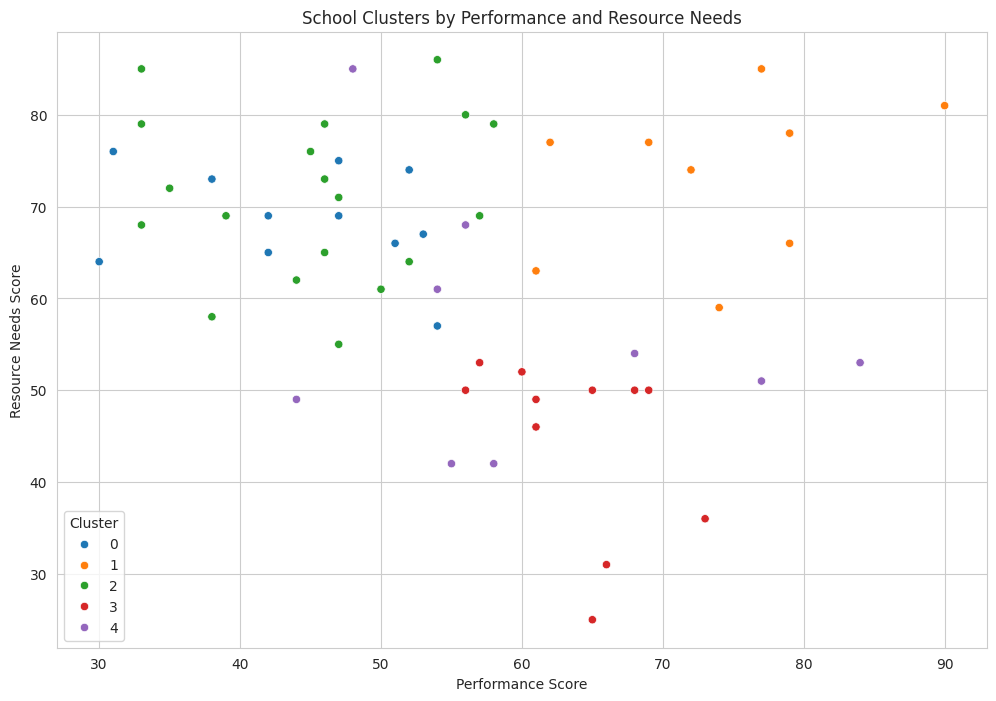

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#PREPARE DATA FOR CLUSTERING
features = clean_df[['student_population', 'performance_score', 'resource_needs_score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#PERFORM KMEANS CLUSTERING
kmeans = KMeans(n_clusters=CLUSTER_K, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

clean_df['cluster'] = clusters

#ANALYZE CLUSTER RESULTS
cluster_summary = clean_df.groupby('cluster').agg({
    'student_population': 'mean',
    'performance_score': 'mean',
    'resource_needs_score': 'mean'
})
print("CLUSTER SUMMARY")
display(cluster_summary)

#VISUALIZE CLUSTERS
plt.figure(figsize=FIGURE_SIZE)
sns.scatterplot(x='performance_score', y='resource_needs_score',
               hue='cluster', data=clean_df, palette=COLOR_PALETTE)
plt.title('School Clusters by Performance and Resource Needs')
plt.xlabel('Performance Score')
plt.ylabel('Resource Needs Score')
plt.legend(title='Cluster')
plt.show()


# **RESOURCE ALLOCATION INSIGHTS **



*   Provide data-driven insight for resource allocation decisions.



SCHOOLS WITH THE HIGHEST NEEDS


,school_id,school_name,district,student_population,performance_score,resource_needs_score,performance_category,cluster
31,S1031,Victory Clay Nursery and Primary School,Zombo,602,54,86,Medium,2
6,S1006,Bishop Thomas Secondary School,Moyo,376,77,85,High,1
10,S1010,Bishop Moore High School,Arua,786,33,85,Low,2
16,S1016,Our Lady of Burns High School,Lira,1171,48,85,Medium,4
20,S1020,Our Lady of Garrett High School,Pader,437,90,81,Excellent,1
39,S1039,Bishop Oliver International School,Kitgum,439,56,80,Medium,2
12,S1012,New Vision Meyers International School,Oyam,746,46,79,Medium,2
18,S1018,Nile Scott Nursery and Primary School,Kitgum,501,58,79,Medium,2
37,S1037,St. Paul's Ramirez Secondary School,Terego,677,33,79,Low,2
3,S1003,Victory Steele Academy,Yumbe,472,79,78,High,1


SCHOOLS WITH THE LOWEST NEEDS


,school_id,school_name,district,student_population,performance_score,resource_needs_score,performance_category,cluster
48,S1048,Good Shepherd Wilson Secondary School,Copelandmouth,367,65,25,High,3
43,S1043,Trinity White Academy,West Valerieton,458,66,31,High,3
53,S1053,Trinity Baker College,Chadburgh,283,73,36,High,3
45,S1045,Victory Mckinney High School,Kellyburgh,783,58,42,Medium,4
55,S1055,Bishop Morris Secondary School,Alexandratown,610,55,42,Medium,4
44,S1044,Holy Cross Copeland Secondary School,Harrellchester,417,61,46,High,3
9,S1009,Hope Gregory College,Nwoya,799,44,49,Medium,4
49,S1049,Bishop Perry Academy,West Debbie,212,61,49,High,3
34,S1034,Uganda Martyrs Williams College,Dokolo,340,56,50,Medium,3
47,S1047,St. Joseph's Willis Secondary School,South Luisbury,212,65,50,High,3


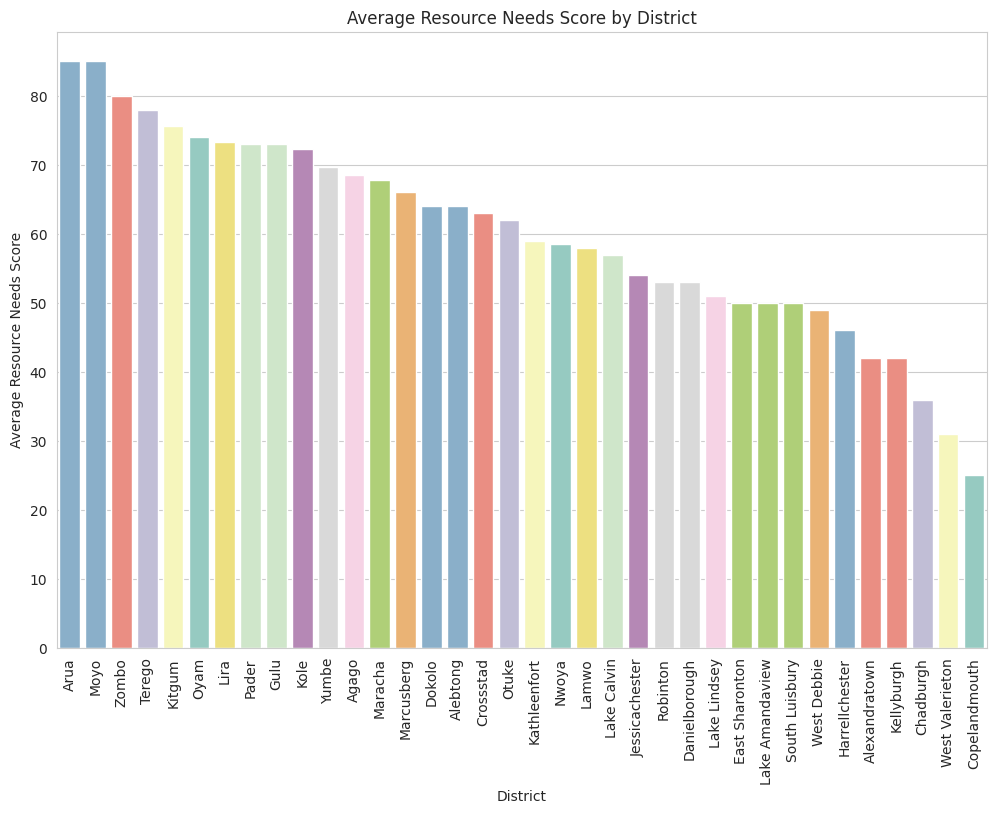

In [49]:
#SCHOOLS WITH THE HIGHEST NEEDS
high_resource_schools = clean_df.nlargest(10, 'resource_needs_score')
print("SCHOOLS WITH THE HIGHEST NEEDS")
display(high_resource_schools)

#SCHOOLS WITH THE LOWEST NEEDS
low_resource_schools = clean_df.nsmallest(10, 'resource_needs_score')
print("SCHOOLS WITH THE LOWEST NEEDS")
display(low_resource_schools)

#VISUALIZE RESOURCE NEEDS BY DISTRICT
plt.figure(figsize=FIGURE_SIZE)
needs_by_district = clean_df.groupby('district')['resource_needs_score'].mean().sort_values(ascending=False)
sns.barplot(x=needs_by_district.index, y=needs_by_district.values, palette='Set3', hue=needs_by_district, legend=False)
plt.xticks(rotation=90)
plt.title('Average Resource Needs Score by District')
plt.xlabel('District')
plt.ylabel('Average Resource Needs Score')
plt.show()
